In [2]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plot_utils as pu
import utils as ut
import copy

## 1. Lane-Emden Numerical Solutions

C:\Users\Pere\AppData\Local\Temp\ipykernel_12396\3614449797.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(color)
C:\Users\Pere\AppData\Local\Temp\ipykernel_12396\3614449797.py:204: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_2.set_ylim(0,5)


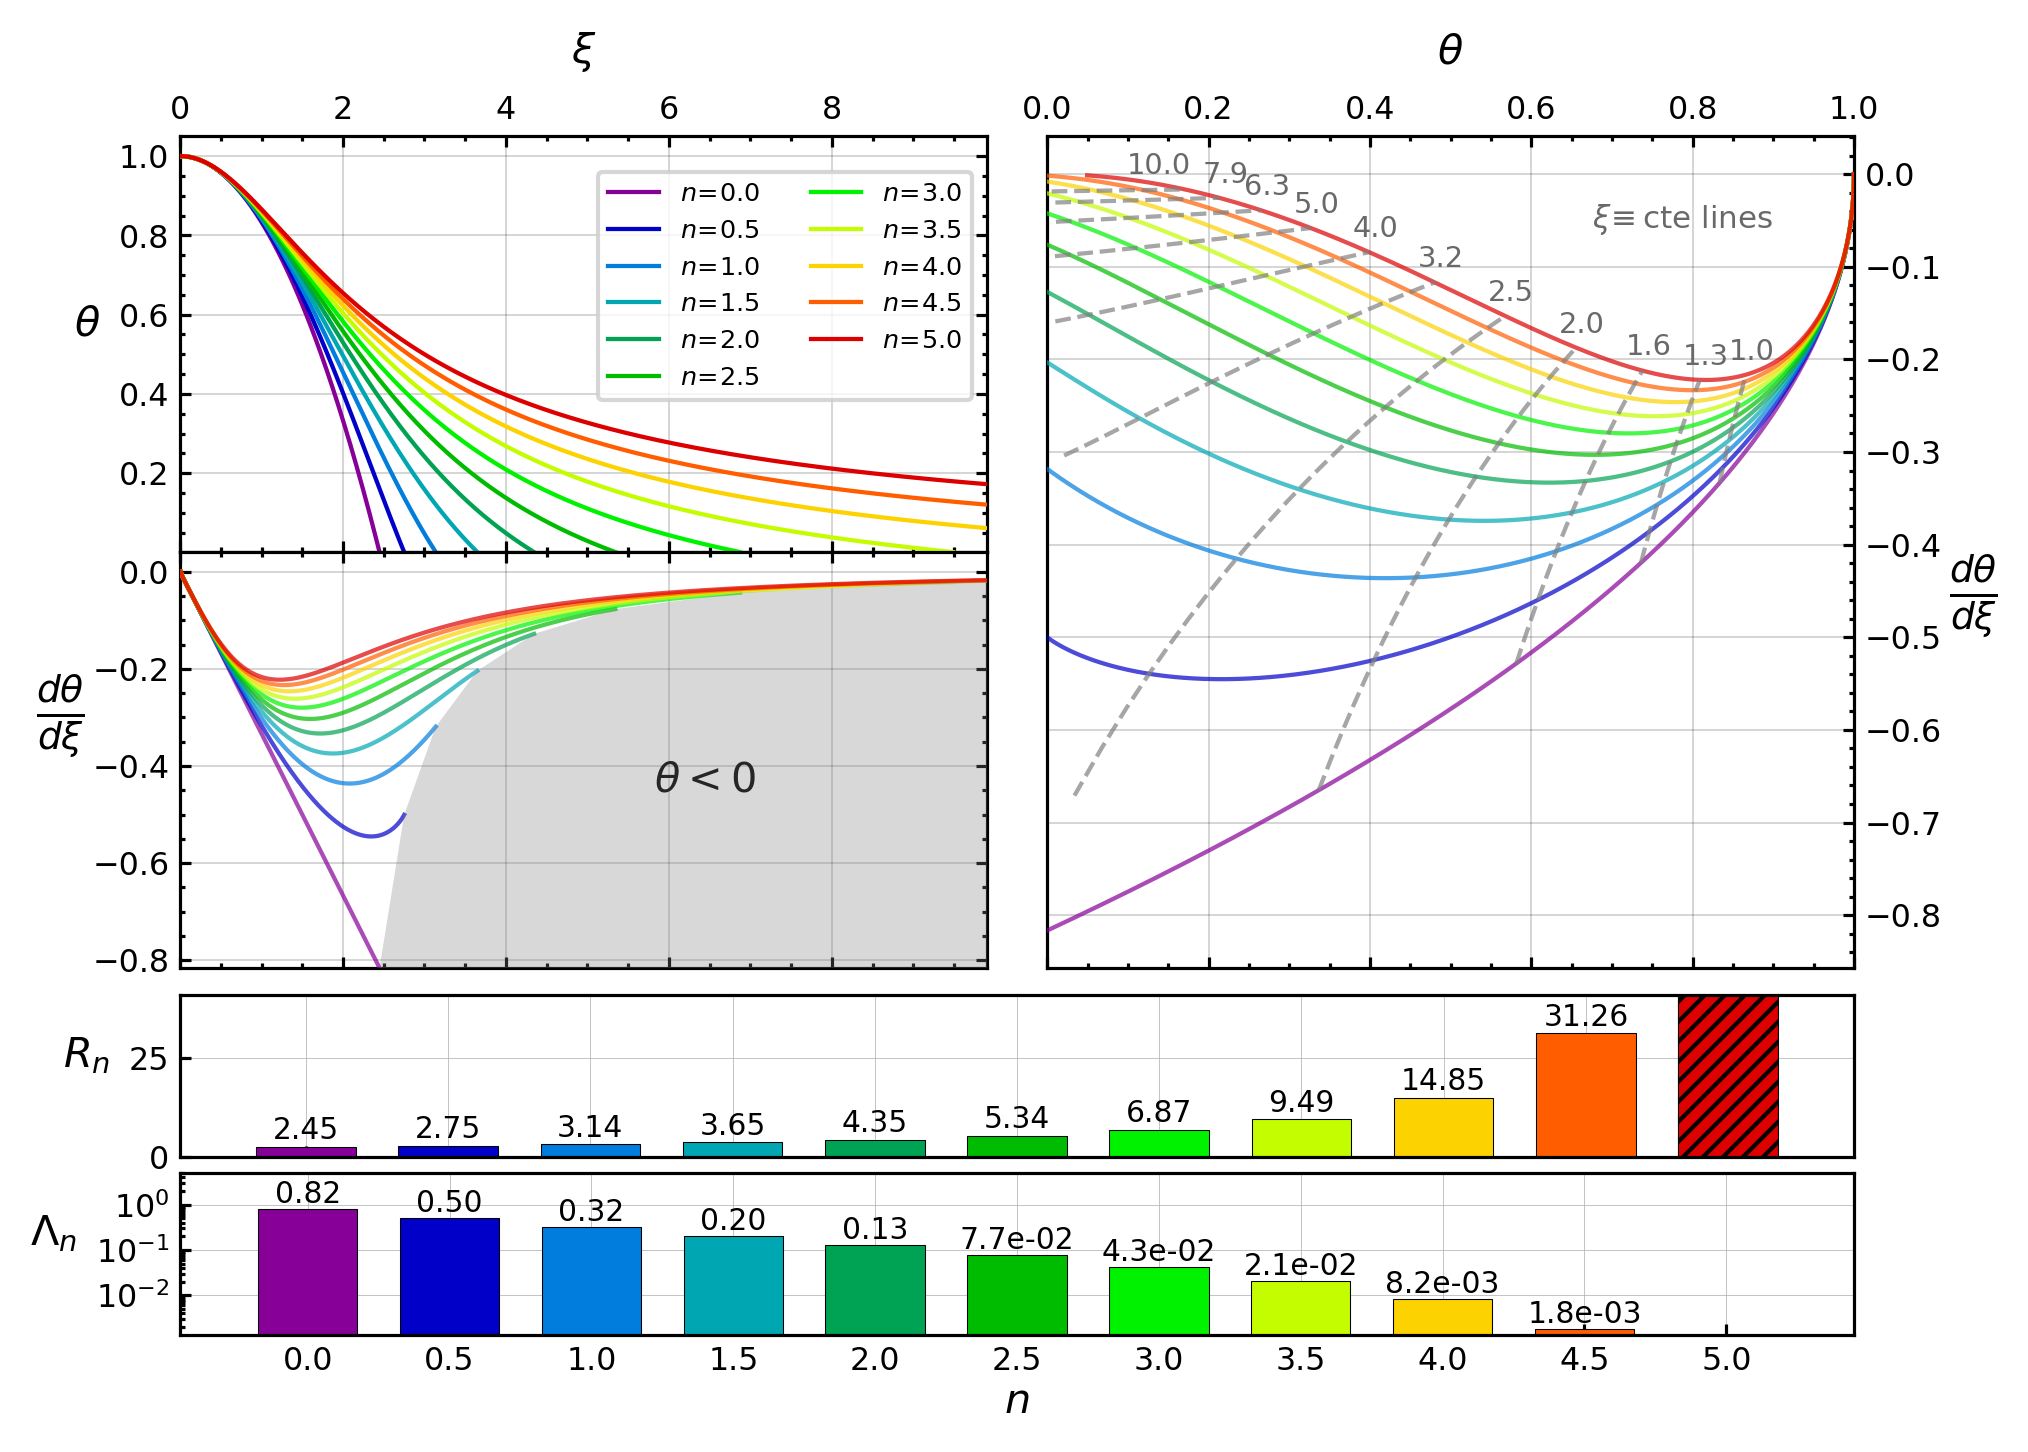

In [8]:
color = 'nipy_spectral'
size, rat = 1080, 2
fig_w, fig_h = size*rat, size
subplots = (2, 2)
lw, ts, pad = 0.1, 1.5, 0.5
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h,
                                        ratio=None, theme=None,
                                        subplots=subplots,
                                        tick_direction='in',
                                        top_bool=True,
                                        ylabel='top',
                                        pad=pad,
                                        layout=None, hspace=0, 
                                        wspace=0.075, ts=ts,
                                        minor=True, wmerge=[1] )

cmap = mpl.cm.get_cmap(color)
colors = [cmap(i) for i in np.linspace(0.1, 0.9, M)]

for i, n in enumerate(enes):
    axs[0][0].plot(xis, th_arr[:, i], color=colors[i], lw=fs * 0.2, zorder=4,
                   label=f'$n\!=\!{n:.1f}$')
    axs[1][0].plot(xis, dthdxi_arr[:, i], color=colors[i], alpha=0.7, lw=fs * 0.2, zorder=4)
    axs[0][1].plot(th_arr[:, i],dthdxi_arr[:, i], color=colors[i], alpha=0.7, lw=fs * 0.2, zorder=4)

x_lim = (0, 9.9)
axs[0][0].set_xlim(x_lim)
axs[1][0].set_xlim(x_lim)
axs[0][1].set_xlim(0, np.nanmax(th_arr))

axs[0][0].set_ylim(np.nanmin(th_arr), None)
axs[1][0].set_ylim(np.nanmin(dthdxi_arr), None)

axs[0][1].yaxis.tick_right()
axs[0][1].yaxis.set_label_position("right")

xi_str = r'$\xi$'
theta_str = r'$\theta$'
# dthdxi_str = r'$d\theta/d\xi$'
dthdxi_str = r'$\frac{d\theta}{d\xi}$'
s, rot, cpad = 1.3, 0, 3
axs[0][0].set_ylabel(theta_str, fontsize=fs * ts * s, rotation=rot,
                     labelpad = cpad*pad * fs)
axs[1][0].set_ylabel(dthdxi_str, fontsize=fs * ts * s * 1.3, rotation=rot,
                     labelpad = cpad*pad * fs)
axs[0][0].set_xlabel(xi_str, fontsize=fs * ts * s, rotation=rot,
                     labelpad = cpad*pad * fs)
axs[0][1].set_xlabel(theta_str, fontsize=fs * ts * s, rotation=rot,
                     labelpad = cpad*pad * fs)
axs[0][1].set_ylabel(dthdxi_str, fontsize=fs * ts * s * 1.3, rotation=rot,
                     labelpad = cpad*pad * fs)

# plot legend for axs[0][0]

axs[0][0].legend(
    loc='upper center',
    bbox_to_anchor=(0.75, 0.945),
    ncol=2,
    # fancybox=True,
    # shadow=True,
    fontsize=fs * ts * 0.8,)

axs[1][0].set_xticklabels([])

idxs = [np.argmin(th_arr[:, i], axis=0) for i in range(M)]
thlim = []
for i, idx in enumerate(idxs):
    thlim.append(dthdxi_arr[idx-1, i])
thlim = np.array(thlim)
axs[1][0].fill_between(extremal_xis, y1=thlim, y2=-1, color='grey', lw=0, zorder=4, alpha=0.3)

# plot text on axs[1][0] 
axs[1][0].text(0.65, 0.45, r'$\theta<0$', fontsize=fs * ts * s, rotation=rot, ha='center', va='center', transform=axs[1][0].transAxes)




const = 0.125
inner_pos=[const, -0.065, 0.9 - const, 0.15] 
ax_ = fig.add_axes(inner_pos)

ax_.tick_params(
    axis="both",
    which="major",
    labelsize=ts * fs,
    size=fs * 0.5,
    width=fs * 0.15,
    pad= pad * fs,
    top=False,
    direction='in'
)
for spine in ax_.spines.values():
    spine.set_linewidth(fs * 0.15)

ax_.grid(
    which="major",
    linewidth=fs * 0.035,
)
# ax_.minorticks_on()
# ax_.tick_params(axis='both', which="minor", 
# direction='in',
# top=False,
# size=fs * 0.25, width=fs * 0.15,)

ax_.set_ylim(0,41)

wdth = 0.5
# make a bar plot of extremal_xis
extremal_xis[-1] = 100
ax_.bar(enes, extremal_xis, color=colors, width=wdth*0.7, edgecolor='k', lw=fs * 0.05, zorder=2)
# put values on top of bars
for i, n in enumerate(enes[:-1]):
    ax_.text(n, extremal_xis[i] + 0.5, f'{extremal_xis[i]:.2f}', ha='center', va='bottom', fontsize=fs * 1.4, rotation=0)

# make hacthes on the last bar
ax_.bar(enes[-1], extremal_xis[-1], color='none', edgecolor='k', hatch='/////', lw=fs * 0.005, zorder=2, width=wdth*0.7,)

# xticks should be enes
ax_.set_xticks(enes)

ax_.set_xticklabels([])

# x label is $n$




inner_pos=[const, -0.23, 0.9 - const, 0.15] 
ax_2 = fig.add_axes(inner_pos)

#ax_2.minorticks_on(axis='y')
ax_2.tick_params(
    axis="both",
    which="major",
    labelsize=ts * fs,
    size=fs * 0.5,
    width=fs * 0.15,
    pad= pad * fs,
    top=False,
    direction='in'
)
ax_2.tick_params(axis='both', which="minor", 
direction='in',
top=False,
right=False,
size=fs * 0.25, width=fs * 0.15,)


for spine in ax_.spines.values():
    spine.set_linewidth(fs * 0.15)

ax_2.grid(
    which="major",
    linewidth=fs * 0.035,
)


cp_ = 0.5
ax_.set_xlabel(r'$n$', fontsize=fs * ts * s, rotation=rot, labelpad = cp_*pad * fs)
ax_.set_ylabel(r'$R_n$', fontsize=fs * ts * s, rotation=rot, labelpad= 1*4* pad * fs)

ax_2.set_xlabel(r'$n$', fontsize=fs * ts * s, rotation=rot, labelpad = cp_*pad * fs)
ax_2.set_ylabel(r'$\Lambda_n$', fontsize=fs * ts * s, rotation=rot, labelpad= 1*4* pad * fs)

ax_2.set_yscale('log')

ax_2.bar(enes[:-1], extremal_dthdxis[:-1], color=colors[:-1], width=wdth*0.7, edgecolor='k', lw=fs * 0.05, zorder=2)

def format_scientific(num):
    # Format the number in scientific notation with 2 decimal places for 'a'
    formatted = f"{num:.2e}"

    # Split the string into the coefficient and exponent parts
    coefficient, exponent = formatted.split('e')
    # Remove the plus sign from the exponent if it exists
    exponent = exponent.replace('+', '')

    # Return the formatted string
    return rf"${coefficient} \times 10^{int(exponent)}$"


for i, n in enumerate(enes[:-1]):    
    y_val = extremal_dthdxis[i]

    if y_val < 0.1:
        str = f'{y_val:0.1e}'
    else:
        str = f'{y_val:.2f}'

    if i == len(enes) - 1:
        str = '0.00'
        y_val = 0.002

    ax_2.text(n, y_val + 0, str, 
             ha='center', va='bottom', fontsize=fs * 1.4, rotation=0)

# make hacthes on the last bar
# ax_2.bar(enes[-1], extremal_dthdxis[-1], color='none', edgecolor='k', hatch='/////', lw=fs * 0.005, zorder=2, width=step*0.7,)

for spine in ax_2.spines.values():
    spine.set_linewidth(fs * 0.15)

ax_2.set_ylim(0,5)
ax_2.set_xlim(-0.45,5.45)

ax_2.set_xticks([])

ax_2.set_xticks(enes)



step = 0.1
enes_2 = np.arange(0, 5 + step, step) 
M_2 = len(enes_2)
xi_range = (0.01, 35)
dt = 1e-4
xis_, th_arr_, dthdxi_arr_ = ut.solve_polytropes(enes_2, dt=dt, xi_range=xi_range)
N = 75000

xi_ctes = np.geomspace(1, 10, 11)
idxs = []
for xi_cte in xi_ctes:
    # find the index of the closest value to xi_cte
    idx = np.argmin(np.abs(xis - xi_cte))
    idxs.append(idx)
th_ = th_arr_[idxs, :]
dthdxi_ = dthdxi_arr_[idxs, :]

for i, n in enumerate(idxs):
    if i != len(idxs) - 1:
        alin = 'center'
    else:
        alin = 'right'

    axs[0][1].plot(th_[i, :], dthdxi_[i, :], color='grey', ls='--', alpha=0.7, lw=fs * 0.2, zorder=4)
    # plot the xi_cte[idx] as text at the end of the line
    axs[0][1].text(th_[i, -1]+0.0075, dthdxi_[i, -1]+0.01, f'{xi_ctes[i]:.1f}', fontsize=fs * ts * s * 0.7, color='dimgrey', rotation=rot, ha=alin, va='bottom', zorder=4)
    
axs[0][1].text(0.9, 0.9, r'$\xi\!\equiv$cte lines', fontsize=fs * ts * s * 0.75, color='dimgrey', rotation=rot, ha='right', va='center', zorder=4, transform=axs[0][1].transAxes)


savefold = '../figures/'
if not os.path.exists(savefold):
    os.makedirs(savefold)
filename = f'fig_1.png'
savepath = os.path.join(savefold, filename)

# save figure
fig.savefig(savepath, dpi=300, bbox_inches='tight')

## 2. Comparing to Analytical Solutions 

C:\Users\Pere\AppData\Local\Temp\ipykernel_11072\3143887434.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(color)


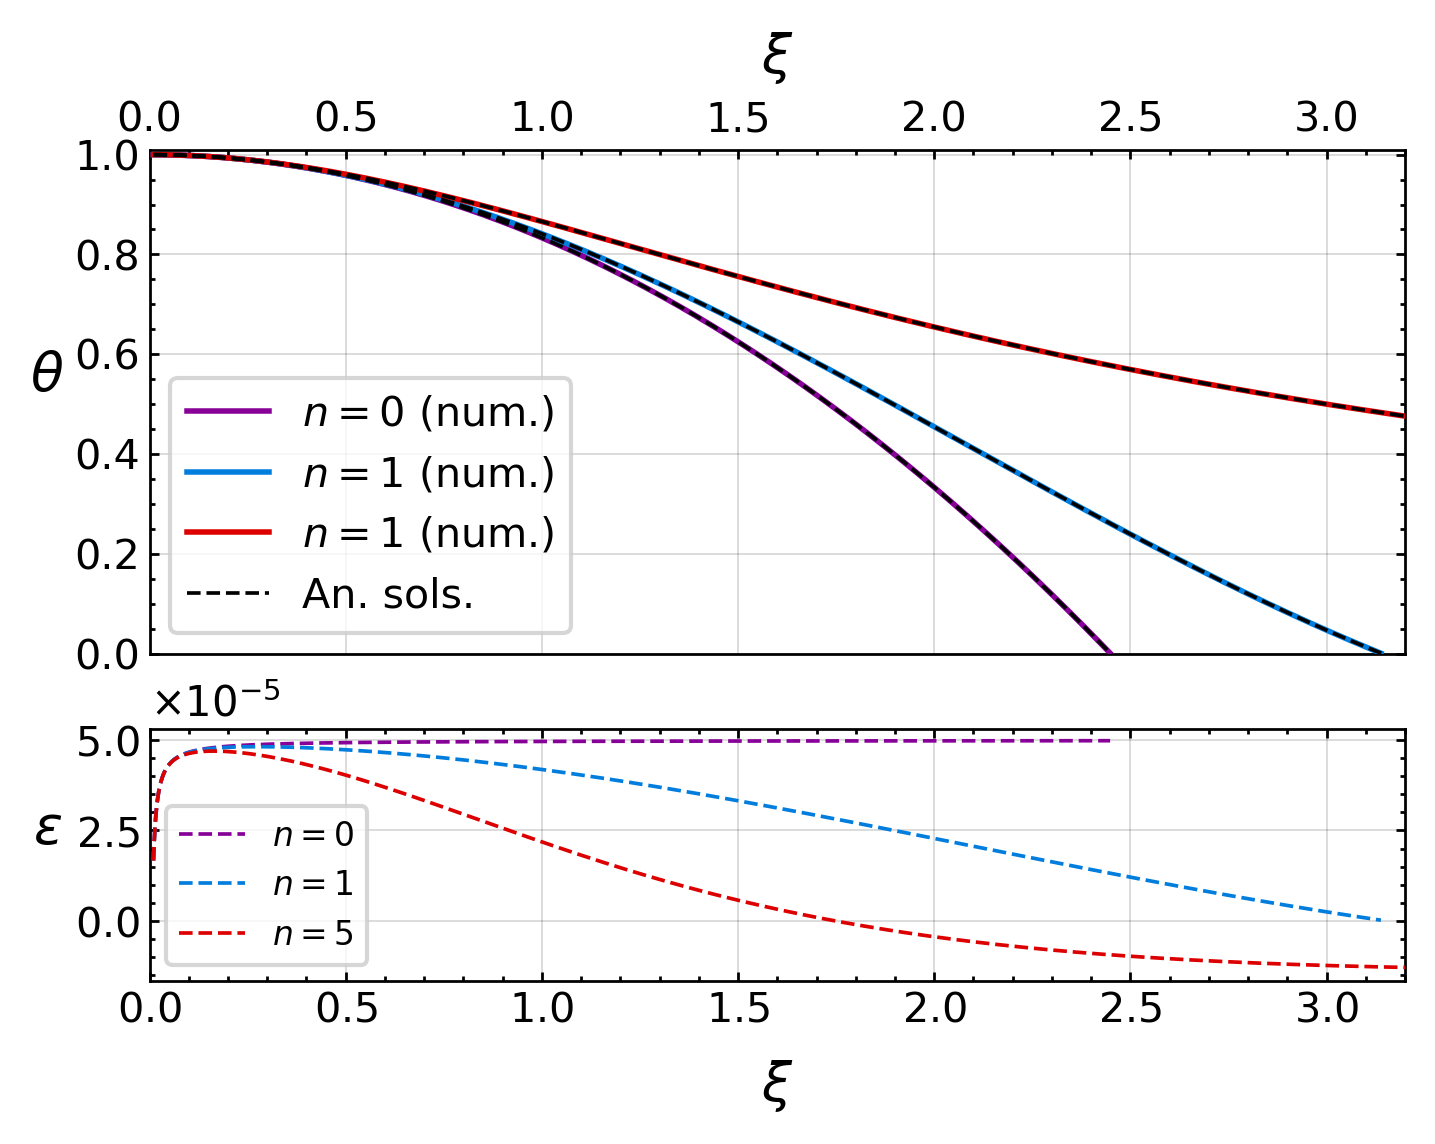

In [5]:
def anal_sol_0(xi):
    return 1 - xi**2 / 6

def anal_sol_1(xi):
    return np.sin(xi) / xi

def anal_sol_5(xi):
    return (1 + xi**2 / 3)**(-1/2)


sol_arr_0, sol_arr_1, sol_arr_5 = anal_sol_0(xis), anal_sol_1(xis), anal_sol_5(xis)

color = 'nipy_spectral'
cmap = mpl.cm.get_cmap(color)
colors = [cmap(i) for i in np.linspace(0.1, 0.9, M)]

size, rat = 1080, 1.5
fig_w, fig_h = size*rat, size
subplots = (2, 1)
lw, ts, pad = 0.1, 2.25, 0.5
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h,
                                        ratio=None, theme=None,
                                        subplots=subplots,
                                        tick_direction='in',
                                        top_bool=True,
                                        pad=pad,
                                        hr = [2,1],
                                        layout=None, hspace=0.2, wspace=0.075,
                                        ts=ts,
                                        minor=True)

# axs[0][0].set_xticklabels([])
# put x axis on top
# axs[0][0].tick_params(axis='x', which='both', length=0)
axs[0][0].xaxis.tick_top()
axs[0][0].xaxis.set_label_position('top')

axs[0][0].plot(xis, sol_arr_0, color='k', lw=fs * 0.2, zorder=4, linestyle='--',
               #label='$n=0$ (an.)'
               )
axs[0][0].plot(xis, th_arr[:, 0], color=colors[0], lw=fs * 0.3, zorder=3,
                label='$n=0$ (num.)')

axs[0][0].plot(xis, sol_arr_1, color='k', lw=fs * 0.2, zorder=4, linestyle='--',
               #label='$n=1$ (an.)'
               )
axs[0][0].plot(xis, th_arr[:, 2], color=colors[2], lw=fs * 0.3, zorder=3,
               label='$n=1$ (num.)')

axs[0][0].plot(xis, th_arr[:, -1], color=colors[-1], lw=fs * 0.3, zorder=3,
               label='$n=1$ (num.)')
axs[0][0].plot(xis, sol_arr_5, color='k', lw=fs * 0.2, zorder=4, linestyle='--',
               label='An. sols.')

err_0 = th_arr[:, 0] - sol_arr_0
axs[1][0].plot(xis, err_0, color=colors[0], lw=fs * 0.2, zorder=4, linestyle='--',
               label='$n=0$')
err_1 = th_arr[:, 2] - sol_arr_1
axs[1][0].plot(xis, err_1, color=colors[2], lw=fs * 0.2, zorder=4, linestyle='--',
               label='$n=1$')
err_5 = th_arr[:, -1] - sol_arr_5
axs[1][0].plot(xis, err_5, color=colors[-1], lw=fs * 0.2, zorder=4, linestyle='--',
               label='$n=5$')

axs[0][0].set_ylim(0, 1.01)

for i in range(len(axs)):
    axs[i][0].set_xlim(0, 3.2)

# from matplotlib.ticker import FuncFormatter
# def custom_formatter(x, pos):
#     if x != 0:
#         exponent = int(np.floor(np.log10(abs(x))))
#         coeff = x / 10**exponent
#         return r'$\times {:.1f} \times 10^{{{}}}$'.format(coeff, exponent)
#     else:
#         return r'$0$'

# axs[1][0].yaxis.set_major_formatter(FuncFormatter(custom_formatter))
axs[1][0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().ticklabel_format(useMathText=True)


xi_str = r'$\xi$'
theta_str = r'$\theta$'
# dthdxi_str = r'$d\theta/d\xi$'
dthdxi_str = r'$\frac{d\theta}{d\xi}$'
s, rot, cpad = 1.3, 0, 3
axs[0][0].set_ylabel(theta_str, fontsize=fs * ts * s, rotation=rot,
                     labelpad = cpad*pad * fs)
axs[0][0].set_xlabel(xi_str, fontsize=fs * ts * s, rotation=rot,
                     labelpad = cpad*pad * fs)
axs[1][0].set_ylabel('$\epsilon$', fontsize=fs * ts * s, rotation=rot,
                     labelpad = cpad*pad * fs)
axs[1][0].set_xlabel(xi_str, fontsize=fs * ts * s, rotation=rot,
                     labelpad = cpad*pad * fs)

# # log yaxis for axs[1][0]
# axs[1][0].set_yscale('log')

axs[0][0].legend(
    loc='lower left',
    ncol=1,
    # fancybox=True,
    # shadow=True,
    fontsize=fs * ts * 1,)


axs[1][0].legend(
    loc='lower left',
    ncol=1,
    # fancybox=True,
    # shadow=True,
    fontsize=fs * ts * 0.8,)

savefold = '../figures/'
if not os.path.exists(savefold):
    os.makedirs(savefold)
filename = f'fig_2.png'
savepath = os.path.join(savefold, filename)

# save figure
fig.savefig(savepath, dpi=300, bbox_inches='tight')

plt.show()

In [103]:
enes_ = [0, 1, 5]
xi_range = (0.01, 10)

# ass = [100, 1000, 10000]
# Ns = []
# for a in ass:
#     step = 10*a
#     Ns.append(list(np.arange(step, 100*a, step)))
# Ns = [item for sublist in Ns for item in sublist]

dts = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

errs = {}

for i, n in enumerate(enes_):
    errs[f'{int(n)}'] = np.zeros((len(dts)))
    
    for j, dt in enumerate(dts):

        xis_, th_arr_, dthdxi_arr_ = ut.solve_polytropes(enes_, dt=dt, xi_range=xi_range)
        thetas = th_arr_[:,i]

        if int(n) == 0:
            sol_arr = anal_sol_0(xis_)
        elif int(n) == 1:
            sol_arr = anal_sol_1(xis_)
        elif int(n) == 5:
            sol_arr = anal_sol_5(xis_)

        err = sol_arr - thetas

        err_mean = np.nanmean(np.abs(err))

        errs[f'{int(n)}'][j] = err_mean
        


In [104]:
print('dt:', dts[:])
print('\epsilon (n=0):', errs['0'][:])
print('\epsilon (n=1):', errs['1'][:])
print('\epsilon (n=5):', errs['5'][:])

dt: [0.1, 0.01, 0.001, 0.0001, 1e-05]
\epsilon (n=0): [3.36268973e-04 4.90890139e-05 4.92413470e-05 4.92473825e-05
 4.92479737e-05]
\epsilon (n=1): [2.41478772e-04 2.89290442e-05 2.89951933e-05 2.90001169e-05
 2.90005723e-05]
\epsilon (n=5): [1.23757951e-04 1.32911869e-05 1.33027076e-05 1.33028147e-05
 1.33028229e-05]


## 3. Computing the Coefficients

In [5]:
step = 0.5
enes = np.arange(0, 5 + step, step) 

xi_range = (0.01, 32)
dt = 5e-3
xis, th_arr, dthdxi_arr = ut.solve_polytropes(enes, dt=dt, xi_range=xi_range)

coefs, n_coef = ut.get_coefs(enes, xis, th_arr, dthdxi_arr)

# empty pandas dataframe
df = pd.DataFrame()
# row names are the keys of n_coef
df['n'] = enes
for coef in n_coef:
    df[coef] = n_coef[coef]

# two digit precision in dataframe
df = df.round(3)
print(df)

c:\Users\Pere\Documents\ULL\subjects\q1\estructura_y_evolucion_estelar_O\projects\entregable_1\code\utils.py:73: RuntimeWarning: invalid value encountered in scalar power
  edo = - theta ** n - 2 / xi * dthetadxi


      n     R_n    G_n       D_n    M_n    B_n
0   0.0   2.450  0.815     1.002  4.894  0.347
1   0.5   2.755  0.501     1.834  3.802  0.274
2   1.0   3.140  0.320     3.276  3.152  0.233
3   1.5   3.651  0.204     5.958  2.722  0.205
4   2.0   4.346  0.128    11.320  2.417  0.185
5   2.5   5.346  0.077    23.239  2.191  0.169
6   3.0   6.876  0.043    53.616  2.021  0.156
7   3.5   9.491  0.021   150.605  1.893  0.145
8   4.0  14.847  0.008   606.649  1.798  0.135
9   4.5  31.265  0.002  5860.395  1.738  0.126
10  5.0  32.000  0.002  6332.277  1.725  0.116


In [42]:
step = 0.025
enes = np.arange(0, 5 + step, step) 


xi_range = (0.01, 200)
dt = 1e-2
xis, th_arr, dthdxi_arr = ut.solve_polytropes(enes, dt=dt, xi_range=xi_range)

coefs, n_coef = ut.get_coefs(enes, xis, th_arr, dthdxi_arr)


c:\Users\Pere\Documents\ULL\subjects\q1\estructura_y_evolucion_estelar_O\projects\entregable_1\code\utils.py:73: RuntimeWarning: invalid value encountered in scalar power
  edo = - theta ** n - 2 / xi * dthetadxi


In [53]:
your_list = n_coef['R_n']

# Reverse the list for processing
reversed_list = your_list[::-1]

# Get the last element (which will be the repeated one)
last_element = reversed_list[0]

# Find the first element that doesn't match the last element
for index, value in enumerate(reversed_list):
    if value != last_element:
        # The index of the first element of the repeated sequence in the original list
        first_repeated_index = len(your_list) - index 
        break

last_good_n = enes[first_repeated_index]

C:\Users\Pere\AppData\Local\Temp\ipykernel_25764\693488278.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(color)
C:\Users\Pere\AppData\Local\Temp\ipykernel_25764\693488278.py:52: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  span1 = ax_.axvspan(last_good_n, 5, alpha=1, hatch='//////', color='none', facecolor='none', zorder=1,  linewidth=0, edgecolor='k')


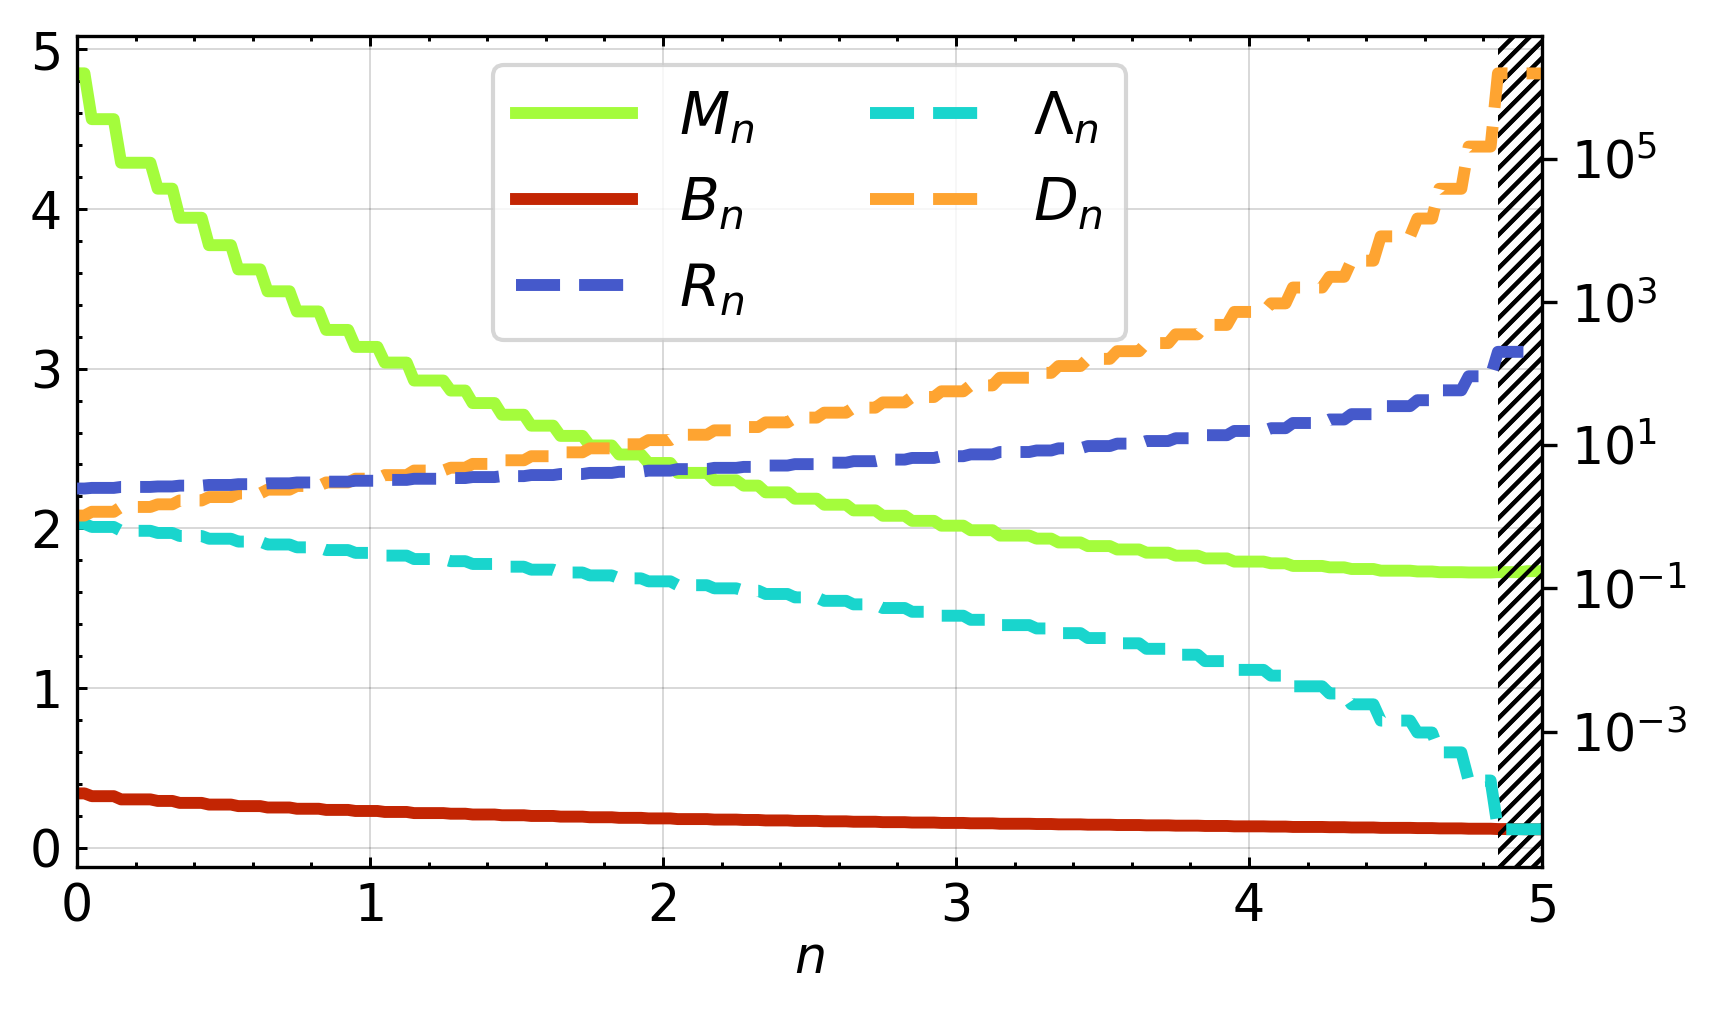

In [70]:
size, rat = 1080, 1.75
fig_w, fig_h = size*rat, size
subplots = (1, 1)
lw, ts, pad = 0.1, 2.55, 0.75
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h,
                                        ratio=None, theme=None,
                                        subplots=subplots,
                                        tick_direction='in',
                                        top_bool=True,
                                        pad=pad,
                                        layout=None, hspace=0, wspace=0.075,
                                        # hr = [4,1],
                                        ts=ts,
                                        minor=True)
ax = axs[0][0]

# twin axes
ax1 = ax.twinx()

#ax1 = axs[1][0]

ax1.set_yscale('log')

# set minor ticks ax1
ax1.minorticks_on()
#change ytick label size for ax1
ax1.tick_params(axis='y', which='major', labelsize=ts * fs)


# ax1.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)


# ax.tick_params(axis='x', which='both', bottom=False)
# ax1.tick_params(axis='x', which='both', top=False, labeltop=False)

color = 'turbo'
cmap = mpl.cm.get_cmap(color)
colors = [cmap(i) for i in np.linspace(0.1, 0.9, 5)]

lww = 0.6
ax1.plot(enes, n_coef['R_n'], label='$R_n$', color=colors[0], ls='--', lw=fs * lww, zorder=4)
ax1.plot(enes, n_coef['G_n'], label='$\Lambda_n$', color=colors[1], lw=fs * lww, ls='--')
ax.plot(enes, n_coef['M_n'], label='$M_n$', color=colors[2], lw=fs * lww)
ax1.plot(enes, n_coef['D_n'], label='$D_n$', color=colors[3], lw=fs * lww, ls='--')
ax.plot(enes, n_coef['B_n'], label='$B_n$', color=colors[4], lw=fs * lww)



for ax_ in [ax, ax1]:
    ax_.set_xlim(0, 5)
    span1 = ax_.axvspan(last_good_n, 5, alpha=1, hatch='//////', color='none', facecolor='none', zorder=1,  linewidth=0, edgecolor='k')
    span1.set_edgecolor('k') 

ax.set_xlabel('$n$', fontsize=fs * ts , rotation=0,
                        labelpad = 0.1 * fs)

handles_ax, labels_ax = ax.get_legend_handles_labels()

# Get the handles and labels for ax1
handles_ax1, labels_ax1 = ax1.get_legend_handles_labels()

# Combine the handles and labels
handles = handles_ax + handles_ax1
labels = labels_ax + labels_ax1

# Create a single legend with the combined handles and labels
ax.legend(handles, labels, loc='upper center', ncol=2, fontsize=fs * ts * 1.15)

savefold = '../figures/'
if not os.path.exists(savefold):
    os.makedirs(savefold)
filename = f'fig_params.png'
savepath = os.path.join(savefold, filename)

# save figure
fig.savefig(savepath, dpi=300, bbox_inches='tight')

